In [ ]:
# Install package
!pip install cloudmesh-installer -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=9eebbc183c416f4b0b81044a2b66b6fa6825542994a38b95e17e0263d0e5db27
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c973

In [ ]:
# Import Libraries
import pandas as pd
from cloudmesh.common.util import readfile
import seaborn as sns
import matplotlib.pyplot as plt
import json


# Read the file
content = readfile('mlperf_cloudmask_final.log').splitlines()


# Create lists
ear_training_accuracy = []
ear_validation_accuracy = []
ear_training_loss = []
ear_validation_loss = []
ear_test_loss = []
ear_test_acc = []
ear_time_per_inference = []
for line in content:
  if ':::MLLOG' in line and '"key": "result"' in line and 'training' in line: # Locate result
    print(line)
    d = json.loads(line.split(":::MLLOG ")[1]) # String to a dict json.loads
    print(line)
    ear_training_accuracy.append(d["value"]["training"]["history"]["accuracy"])
    ear_validation_accuracy.append(d["value"]["training"]["history"]["val_accuracy"])
    ear_training_loss.append(d["value"]["training"]["history"]["loss"])
    ear_validation_loss.append(d["value"]["training"]["history"]["val_loss"])

    if "avg_accuracy" in line:
      ear_test_acc.append(d["value"]["inference"]["avg_accuracy"])
    else:
      ear_test_acc.append(d["value"]["inference"]["accuracy"])
    ear_time_per_inference.append(d["value"]["inference_analyze"]["time_per_inference"])

# Create lists
ear_time_for_training = []
ear_time_for_inference = []
ear_epochs = []

# Read contents in the file
content = readfile('cloudmask_final.log').splitlines()
for line in content:
  split_line = line.split(",")
  for vals in split_line:
    if "CloudMask training" in split_line and 'time_per' in vals.strip():
      ear_time_for_training.append(float(vals.split("=")[1]))
    elif "CloudMask inference" in split_line and 'time_per' in vals.strip():
      ear_time_for_inference.append(float(vals.split("=")[1]))

    if "epochs" in vals.strip():
      ear_epochs.append(int(vals.split("=")[1]))

# Create dataframe
train_data = []
inf_data = []
for i in range(len(ear_training_accuracy)):
  for j in range(len(ear_training_accuracy[i])):
    train_data.append(["Run "+str(i+1),j+1,ear_training_accuracy[i][j],ear_validation_accuracy[i][j],ear_training_loss[i][j],ear_validation_loss[i][j]])
  inf_data.append([len(ear_training_accuracy[i]),ear_test_acc[i]])

ear_df_train = pd.DataFrame(train_data, columns=['run','Epoch','Training Accuracy','Validation Accuracy','Training Loss','Validation Loss'])
ear_df_train

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


:::MLLOG {"namespace": "", "time_ms": 1687430529556, "event_type": "POINT_IN_TIME", "key": "result", "value": {"name": "cloudmask", "training": {"samples": 970, "accuracy": 0.89594966173172, "loss": 0.23772850632667542, "val_loss": 0.2569921910762787, "val_accuracy": 0.8912339210510254, "history": {"accuracy": [0.7972086071968079, 0.7976041436195374, 0.806613028049469, 0.8052724599838257, 0.8071157932281494, 0.8085187077522278, 0.8148983120918274, 0.8217130899429321, 0.8185941576957703, 0.8236292004585266, 0.825827956199646, 0.8315095901489258, 0.8389835357666016, 0.842465341091156, 0.8491077423095703, 0.8484302759170532, 0.849860429763794, 0.8538708686828613, 0.853906512260437, 0.8587257862091064, 0.8621310591697693, 0.8651719093322754, 0.8660398125648499, 0.8614476919174194, 0.8659389615058899, 0.8671746850013733, 0.8687581419944763, 0.8702470064163208, 0.8714064359664917, 0.8702369928359985, 0.8717522621154785, 0.8726235032081604, 0.8728274703025818, 0.8731074333190918, 0.8745371103

,run,Epoch,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,Run 1,1,0.797209,0.750380,0.421588,0.419191
1,Run 1,2,0.797604,0.791550,0.391331,0.418353
2,Run 1,3,0.806613,0.757510,0.386374,0.409361
3,Run 1,4,0.805272,0.747096,0.381085,0.421423
4,Run 1,5,0.807116,0.761328,0.374489,0.406067
...,...,...,...,...,...,...
887,Run 5,179,0.895457,0.889167,0.236974,0.262065
888,Run 5,180,0.896598,0.889912,0.234854,0.258126
889,Run 5,181,0.896334,0.888650,0.235586,0.259849
890,Run 5,182,0.895602,0.888521,0.236880,0.263253


In [ ]:
# Create inference dataframe
ear_df_inf = pd.DataFrame(inf_data, columns=['Epoch','Inference Accuracy'])
ear_df_inf


,Epoch,Inference Accuracy
0,200,0.884168
1,147,0.896051
2,162,0.890086
3,200,0.889887
4,183,0.885192


In [ ]:
ear_time_for_inference

[1.73, 1.46, 1.44, 1.53, 1.41]

In [ ]:
ear_time_for_training

[142.47, 98.75, 108.16, 126.44, 121.21]

In [ ]:
# Sorting values by loss
ear_df_train.sort_values(by=['Validation Loss','Training Loss']).head(70)

,run,Epoch,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
321,Run 2,122,0.906214,0.897478,0.215816,0.238707
314,Run 2,115,0.905003,0.897259,0.217082,0.239765
344,Run 2,145,0.908725,0.896625,0.210528,0.240114
316,Run 2,117,0.905724,0.895151,0.216078,0.241212
333,Run 2,134,0.907181,0.897230,0.213384,0.241628
...,...,...,...,...,...,...
508,Run 3,162,0.897208,0.888933,0.235268,0.256331
842,Run 5,134,0.893115,0.890723,0.242637,0.256333
687,Run 4,179,0.895706,0.890925,0.237048,0.256364
195,Run 1,196,0.896355,0.890667,0.236975,0.256403


In [ ]:
# Selecting specific runs' output
df_run = ear_df_train.loc[ear_df_train['run'].isin(['Run 5'])]
df_run

,run,Epoch,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
709,Run 5,1,0.793910,0.758150,0.418564,0.420588
710,Run 5,2,0.803342,0.776907,0.384881,0.418963
711,Run 5,3,0.802749,0.789946,0.382753,0.408378
712,Run 5,4,0.804913,0.759654,0.402923,0.444191
713,Run 5,5,0.800925,0.796265,0.412747,0.389910
...,...,...,...,...,...,...
887,Run 5,179,0.895457,0.889167,0.236974,0.262065
888,Run 5,180,0.896598,0.889912,0.234854,0.258126
889,Run 5,181,0.896334,0.888650,0.235586,0.259849
890,Run 5,182,0.895602,0.888521,0.236880,0.263253


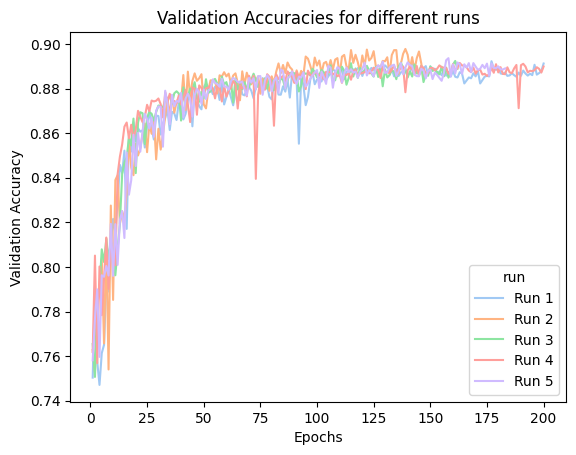

In [ ]:
# Displaying all runs seperately
#box_plot = sns.lineplot(y=ear_df_train["Training Loss"], x=ear_df_train["Epoch"],label = "Training Loss",hue='run')
sns.color_palette("pastel")
box_plot = sns.lineplot(data=ear_df_train,y="Validation Accuracy", x="Epoch",hue='run',palette="pastel")
box_plot.set_title("Validation Accuracies for different runs")
box_plot.set(xlabel = "Epochs", ylabel = "Validation Accuracy")
plt.show()

box_plot.figure.savefig("validation_accuracy_diff_runs.svg")
box_plot.figure.savefig("validation_accuracy_diff_runs.png", dpi=300)
box_plot.figure.savefig("validation_accuracy_diff_runs.pdf")

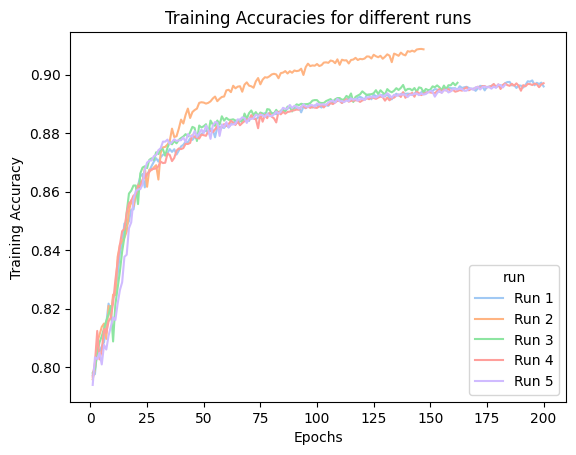

In [ ]:
#box_plot = sns.lineplot(y=ear_df_train["Training Loss"], x=ear_df_train["Epoch"],label = "Training Loss",hue='run')
sns.color_palette("pastel")
box_plot = sns.lineplot(data=ear_df_train,y="Training Accuracy", x="Epoch",hue='run',palette="pastel")
box_plot.set_title("Training Accuracies for different runs")
box_plot.set(xlabel = "Epochs", ylabel = "Training Accuracy")
plt.show()

box_plot.figure.savefig("training_accuracy_diff_runs.svg")
box_plot.figure.savefig("training_accuracy_diff_runs.png", dpi=300)
box_plot.figure.savefig("training_accuracy_diff_runs.pdf")

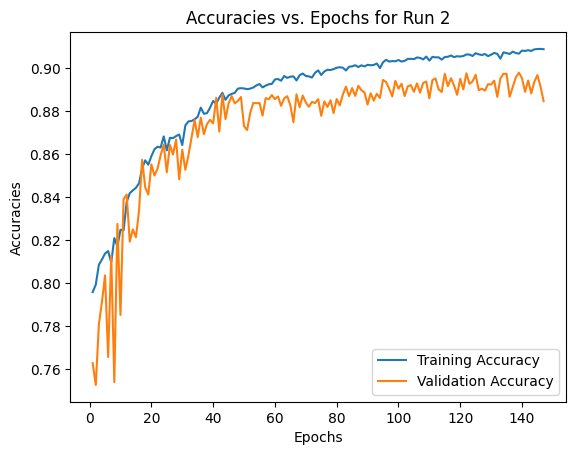

In [ ]:
#early_stopping = [3,3,3,3,3,3,5,5,5,5,5,7,7,7,7,7]
box_plot = sns.lineplot(y=df_run["Training Accuracy"], x=df_run["Epoch"],label = "Training Accuracy");
box_plot = sns.lineplot(y=df_run["Validation Accuracy"], x=df_run["Epoch"],label = "Validation Accuracy");
#box_plot = sns.lineplot(y=ear_df_inf["Inference Accuracy"], x=ear_df_inf["Epoch"],label = "Test Loss of Constant LR");
#box_plot = sns.lineplot(y=ear_df["Training Loss"], x=ear_df["Epoch"],label = "Training Loss");
#box_plot = sns.lineplot(y=ear_df["Validation Loss"], x=ear_df["Epoch"],label = "Validation Loss");
#box_plot = sns.lineplot(y=ear_df["Inference Accuracy"], x=ear_df["Epoch"],label = "Test Accuracy");
box_plot.set_title("Accuracies vs. Epochs for Run 2")
box_plot.set(xlabel = "Epochs", ylabel = "Accuracies")
# Saving figure in different formats

box_plot.figure.savefig("epoch_vs_accuracy.svg")
box_plot.figure.savefig("epoch_vs_accuracy.png", dpi=300)
box_plot.figure.savefig("epoch_vs_accuracy.pdf")

plt.show()